In [25]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [26]:
X = np.random.normal(100,40,100)
X1 = np.random.normal(130,20,100)
theta0 = 1
theta1 = 2
theta2 = 3
y =(theta0+theta1*X)+np.random.normal(0,35,100)
m=len(X)

X_mat = np.matrix(X)
X_mat = np.matrix([X,X1]).T
X_mat.shape

(100, 2)

In [27]:
X_con = np.concatenate([np.ones([m,1]),X_mat],1)

In [28]:
y_mat = np.matrix(y).T

In [29]:
theta_opt = np.linalg.inv(X_con.T*X_con)*(X_con.T*y_mat)

In [30]:
theta_opt

matrix([[-29.70690476],
        [  2.19254544],
        [  0.03219196]])

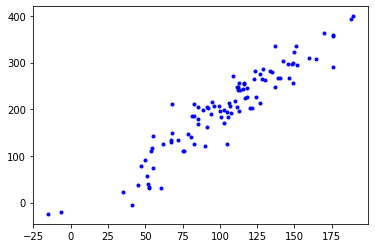

In [31]:
plt.plot(X,y,'b.')

In [32]:
# theta = np.array([[3],[1]])
alpha=0.00001
def h(x,theta):
    return np.dot(x,theta)

def optimal_theta(X,y):    
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

def cost_function(X, y, theta):
    hypothesis = hypothesis_function(X,theta.T)
    return (1/(2*100)) * np.dot((hypothesis-y).T, (hypothesis-y))

theta_optimal = optimal_theta(X_con,y_mat)
print(theta_optimal)
y_analytical = h(X_con, theta_optimal)

def cost_function(X, y, theta):
    hypothesis = h(X,theta.T)
    return (1/(2*100)) * np.dot((hypothesis-y).T, (hypothesis-y))

def stochastic(X,y,theta,alpha, iteration):
    m = len(y)
    cost_history = np.zeros(iteration)
    for i in range(iteration):
        cost = 0.0
        for j in range(m):
            rand_index = np.random.randint(0,m)
            x = X[rand_index,:].reshape(1,X.shape[1])
            yi = y[rand_index,:].reshape(1,1)
            hypothesis = np.dot(x,theta)
#             print((hypothesis - yi).shape,x.shape,(np.dot(x.T,(hypothesis - yi)).shape))
            theta = theta + alpha * (np.dot(x.T,(-hypothesis + yi)))
            cost += cost_function(x,yi,theta.T)
        cost_history[i] = cost
    return theta, cost_history

theta1 = np.random.randn(3,1)
theta_sto, cost_history = stochastic(X_con,y_mat,theta1,0.00000001,150)

y_sto = np.dot(X_con,theta_sto)

[[-29.70690476]
 [  2.19254544]
 [  0.03219196]]


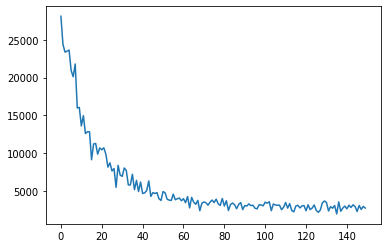

In [33]:
plt.plot(cost_history)

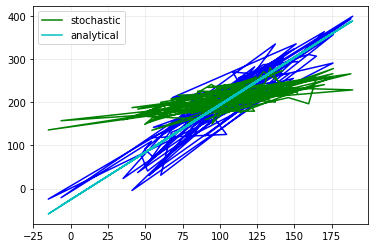

In [48]:
fig3 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X,y,'b-')
plt.plot(X,y_sto,'g-',label='stochastic')
plt.plot(X,y_analytical,'c-',label='analytical')
plt.legend()
plt.show()

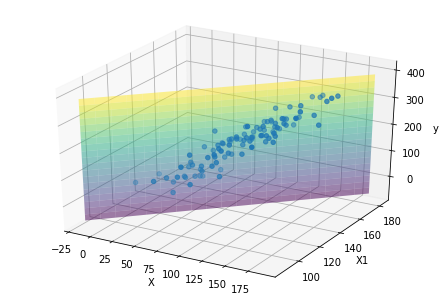

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,X1,y)
ax.set_xlabel('X')
ax.set_ylabel('X1')
ax.set_zlabel('y')
cm = plt.cm.get_cmap('viridis')
xx1 = np.linspace(np.min(X), np.max(X), 20)
xx2 = np.linspace(np.min(X1), np.max(X1), 20)

input_matrix = np.matrix([xx1,xx2]).T
X1 = X
input_matrix = np.concatenate([np.ones([20,1]),input_matrix],axis=1)
y = np.array(y)
theta_optimal = theta_opt
y_predicted1= np.dot(input_matrix,theta_optimal)
ax.plot_surface(xx1,xx2,y_predicted1,cmap= cm,alpha=.5)
# ax.view_init(elev=25, azim=55)
plt.show()
#meshgrid


In [36]:
def gradient(X,y,theta):
    hypothesis = h(X, theta)
    return np.dot(X.T, (hypothesis - y))

alpha = 0.00000001
m = 50

def gradient_descent(X,y,theta,alpha):
    j_iter = np.zeros(m)
    for i in np.arange(m):
        theta = theta - alpha * gradient(X, y, theta)
        hypothesis = h(X,theta)
        j_iter[i] = cost_function(X, y, theta.T)[0][0]
    return theta, j_iter

theta_gd1, j_iter_gd1 = gradient_descent(X_con,y_mat,theta1,alpha)
y_gd1 = np.dot(X_con,theta_gd1)

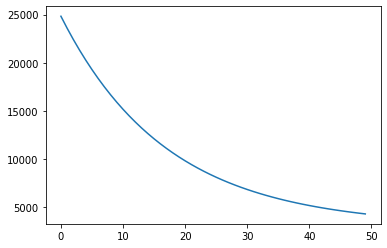

In [37]:
plt.plot(j_iter_gd1)

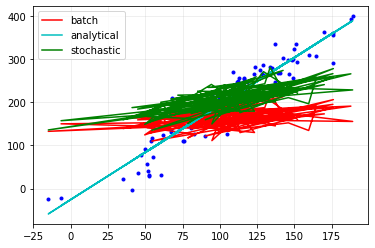

In [38]:
fig3 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X,y,'b.')


plt.plot(X,y_gd1,'r-',label='batch')
plt.plot(X,y_analytical,'c-',label='analytical')
plt.plot(X,y_sto,'g-',label='stochastic')
plt.legend()
plt.show()

In [39]:
def gradient_descent(X,y,theta,alpha):
    j_iter=[]
    theta_iter = [[],[]]
    go = 1
    i = 1
    j_iter.append(cost_function(X,y,theta.T)[0,0])
    while go:
        theta = theta - alpha *(gradient(X, y, theta))
        j_iter.append(cost_function(X, y, theta.T)[0,0])
        if abs(j_iter[i]-j_iter[i-1])<0.00001:
            go = 0
        else:
            go = 1
            i=i+1
        theta_iter = np.append(theta_iter, theta)
    return theta,j_iter,i

theta_gd, j_iter_gd,counter = gradient_descent(X_con,y_mat,theta1,alpha)
y_gd = np.dot(X_con,theta_gd)

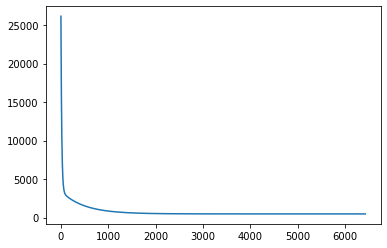

In [40]:
plt.plot(j_iter_gd)

In [41]:
theta_gd

matrix([[-0.31723933],
        [ 2.1567198 ],
        [-0.15638084]])

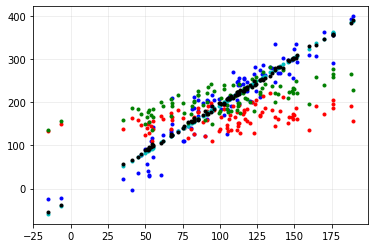

In [42]:
fig3 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X,y,'b.')


plt.plot(X,y_gd1,'r-',label='batch')
plt.plot(X,y_analytical,'c-',label='analytical')
plt.plot(X,y_sto,'g-',label='stochastic')
plt.plot(X,y_gd,'k-',label='batch_auto')

plt.show()

In [43]:
print(theta_gd)

[[-0.31723933]
 [ 2.1567198 ]
 [-0.15638084]]


In [44]:
print(theta_gd1)

[[-0.30772883]
 [ 0.22611991]
 [ 1.05314536]]


In [45]:
print(theta_sto)

[[-0.30697441]
 [ 0.57508338]
 [ 1.11854067]]


In [46]:
print(theta_opt)

[[-29.70690476]
 [  2.19254544]
 [  0.03219196]]
